In [1]:
import matplotlib.pyplot as plt
import glob 
import os 
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error

## Data Concatenation and Feature Extraction

In [225]:
def dump_bearing_data(bearing_id: str, path:str) -> pd.DataFrame:

    data_dir = f'{path}/Bearing{bearing_id}'
    joined_files = os.path.join(data_dir, "acc_*.csv")
    joined_list = glob.glob(joined_files)
    
    raw_data = pd.DataFrame()

    record_count = 0

    for file in joined_list:
        file_data = pd.read_csv(file)
        file_data.columns = ['h','m','s','0.000001s','hori','verti']
        record_count = len(file_data)
        raw_data = pd.concat([raw_data, file_data[["hori","verti"]]], ignore_index=True)

    print({"bearing_id":bearing_id, "file_count":len(joined_list), "record_count":record_count})

    path = f"./Concatenated_Learning_Set/Bearing{bearing_id}"
    os.mkdir(path)

    raw_data.to_csv(f"./Concatenated_Learning_Set/Bearing{bearing_id}/Bearing{bearing_id}_Dump.csv")

    def extractFeatures(raw_data, window_size):
        def SlidingWindow(data, window_length, window_shift, column):
                mov = np.lib.stride_tricks.sliding_window_view(data[column], window_length)[::window_shift]
                return np.array(mov)

        mov1 = SlidingWindow(raw_data, window_size, window_size, "hori")
        mov2 = SlidingWindow(raw_data, window_size, window_size, "verti")

        mean_x = np.mean(mov1, axis=1).reshape(-1,1)
        rms_x = np.sqrt(np.mean(np.array(mov1)**2, axis=1)).reshape(-1,1)
        var_x = np.var(mov1, axis=1).reshape(-1,1)
        std_x = np.std(mov1, axis=1).reshape(-1,1)
        min_abs_x = np.min(np.abs(mov1), axis=1).reshape(-1,1)
        max_abs_x = np.max(np.abs(mov1), axis=1).reshape(-1,1)
        p2p_x = np.ptp(mov1, axis=1).reshape(-1,1)
        # crest_factor_x = np.max(np.abs(mov1), axis=1) / np.sqrt(np.mean(np.square(mov1), axis=1)).reshape(-1,1)
        impulse_factor_x = (np.max(np.abs(mov1),axis=1)/np.mean(np.abs(mov1),axis=1)).reshape(-1,1)
    

        mean_y = np.mean(mov2, axis=1).reshape(-1,1)
        rms_y = np.sqrt(np.mean(np.array(mov2)**2, axis=1)).reshape(-1,1)
        var_y = np.var(mov2, axis=1).reshape(-1,1)
        std_y = np.std(mov2, axis=1).reshape(-1,1)
        min_abs_y = np.min(np.abs(mov2), axis=1).reshape(-1,1)
        max_abs_y = np.max(np.abs(mov2), axis=1).reshape(-1,1)
        p2p_y = np.ptp(mov2, axis=1).reshape(-1,1)
        # crest_factor_y = np.max(np.abs(mov2), axis=1) / np.sqrt(np.mean(np.square(mov2), axis=1)).reshape(-1,1)
        impulse_factor_y = (np.max(np.abs(mov2),axis=1)/np.mean(np.abs(mov2),axis=1)).reshape(-1,1)

        columns = ["mean_x", "mean_y", "rms_x", "rms_y", "var_x", "var_y", "std_x", "std_y", "min_abs_x", "min_abs_y", "max_abs_x", "max_abs_y", "p2p_x", "p2p_y", "impulse_factor_x", "impulse_factor_y"]
        features = [mean_x, mean_y, rms_x, rms_y, var_x, var_y, std_x, std_y, min_abs_x, min_abs_y, max_abs_x, max_abs_y, p2p_x, p2p_y, impulse_factor_x, impulse_factor_y]

        return columns, features

    column_names, column_data = extractFeatures(raw_data, record_count)
    extracted_data = pd.DataFrame(np.concatenate(column_data, axis=1), columns=column_names)
    extracted_data.to_csv(f"./Concatenated_Learning_Set/Bearing{bearing_id}/Bearing{bearing_id}_Features.csv")

    return extracted_data

#### Extracting Training Data

In [226]:
for i in range(1, 4):
    for j in range(1, 3):
        bearing_id = f"{i}_{j}"
        if(i == 3 and j == 4):
            break
        extracted_data = dump_bearing_data(bearing_id, "./ieee-phm-2012-data-challenge-dataset-master/Learning_set/")

{'bearing_id': '1_1', 'file_count': 2803, 'record_count': 2559}
{'bearing_id': '1_2', 'file_count': 871, 'record_count': 2559}
{'bearing_id': '2_1', 'file_count': 911, 'record_count': 2559}
{'bearing_id': '2_2', 'file_count': 797, 'record_count': 2559}
{'bearing_id': '3_1', 'file_count': 515, 'record_count': 2559}
{'bearing_id': '3_2', 'file_count': 1637, 'record_count': 2559}


#### Extracting Testing Data

In [227]:
for i in range(1, 4):
    for j in range(3, 8):
        bearing_id = f"{i}_{j}"
        if(i == 3 and j == 4):
            break
        extracted_data = dump_bearing_data(bearing_id, "./ieee-phm-2012-data-challenge-dataset-master/Test_set/")

{'bearing_id': '1_3', 'file_count': 1802, 'record_count': 2559}
{'bearing_id': '1_4', 'file_count': 1139, 'record_count': 2559}
{'bearing_id': '1_5', 'file_count': 2302, 'record_count': 2559}
{'bearing_id': '1_6', 'file_count': 2302, 'record_count': 2559}
{'bearing_id': '1_7', 'file_count': 1502, 'record_count': 2559}
{'bearing_id': '2_3', 'file_count': 1202, 'record_count': 2559}
{'bearing_id': '2_4', 'file_count': 612, 'record_count': 2559}
{'bearing_id': '2_5', 'file_count': 2002, 'record_count': 2559}
{'bearing_id': '2_6', 'file_count': 572, 'record_count': 2559}
{'bearing_id': '2_7', 'file_count': 172, 'record_count': 2559}
{'bearing_id': '3_3', 'file_count': 352, 'record_count': 2559}


## Feature Visualization

step 1: impulse factor + rms

step 2: smooth data such that the rise isnt hidden thats in the end
This can be done by sliding window where the size of the window is set manually. Dist plots for each window calculated and values liying more then 3std away (unusual fluctuations) are replaced with interpolated values.

step 3: smooth further that takes max-abs value to form a learnable curve


<br></br>
extra 1: Some thing like add or add a factor/proportion of max learning curve or some artificial data to smoothen the upper part so it is learnable.

this extra idts is required because we dont want super smooth data

#### Signal Data Visualization

In [3]:
bearing_data = pd.DataFrame()

bearing_ids = ["1_1", "1_2", "2_1", "2_2", "3_1", "3_2", "1_3", "1_4", "1_5", "1_6", "1_7", "2_3", "2_4", "2_5", "2_6", "2_7", "3_3"]
for bearing_id in bearing_ids:
    path = f"./Concatenated_Learning_Set/Bearing{bearing_id}/Bearing{bearing_id}_Dump.csv"
    read_data = pd.read_csv(path)
    columns = [f"Hori_{bearing_id}", f"Verti_{bearing_id}"]
    bearing_data[columns[0]] = read_data["hori"]
    bearing_data[columns[1]] = read_data["verti"]

In [4]:
bearing_data.head()

,Hori_1_1,Verti_1_1,Hori_1_2,Verti_1_2,Hori_2_1,Verti_2_1,Hori_2_2,Verti_2_2,Hori_3_1,Verti_3_1,...,Hori_2_4,Verti_2_4,Hori_2_5,Verti_2_5,Hori_2_6,Verti_2_6,Hori_2_7,Verti_2_7,Hori_3_3,Verti_3_3
0,0.501,-0.480,0.165,-0.140,0.292,0.133,0.125,-0.104,0.278,0.285,...,-0.178,0.137,0.148,0.208,-0.030,-0.542,0.680,-0.213,-0.321,0.196
1,0.138,0.435,0.125,0.542,0.596,0.024,0.035,-0.314,0.143,0.590,...,-0.323,0.177,-0.042,-0.124,-0.382,0.027,0.073,-0.186,-0.224,0.332
2,-0.423,0.240,0.157,-0.261,0.230,0.272,-0.092,0.200,0.090,-0.193,...,0.183,0.032,-0.489,0.032,-0.294,0.319,-0.673,0.305,0.110,-0.189
3,-0.802,0.020,0.421,0.081,-0.225,0.272,0.033,0.211,0.035,-0.109,...,0.562,-0.471,-0.385,-0.373,-0.033,0.485,-0.602,0.303,0.157,-0.426
4,-0.364,0.112,0.683,-0.278,-0.222,-0.263,-0.022,-0.101,0.086,0.281,...,0.210,-0.295,-0.114,0.313,0.293,-0.030,-0.223,0.154,0.255,0.036


In [ ]:
fig, axes = plt.subplots(nrows=17, ncols=2, figsize=(21, 45), sharex=True)

bearing_data.plot(subplots=True, legend=False, ax=axes)
# fig.suptitle(f"Bearing {feature_name}")
# Set titles for each subplot
for i, ax in enumerate(axes.flatten()):
    ax.set_title(bearing_data.columns[i])

plt.tight_layout()

#### Extracted Feature Visualization

In [2]:
feature_grouped_df = {}

columns = ["mean_x", "mean_y", "rms_x", "rms_y", "var_x", "var_y", "std_x", "std_y", "min_abs_x", "min_abs_y", "max_abs_x", "max_abs_y", "p2p_x", "p2p_y", "impulse_factor_x", "impulse_factor_y"]

bearing_ids = ["1_1", "1_2", "2_1", "2_2", "3_1", "3_2", "1_3", "1_4", "1_5", "1_6", "1_7", "2_3", "2_4", "2_5", "2_6", "2_7", "3_3"]

# bearing_ids = ["1_1", "1_2", "2_1", "2_2", "3_1", "3_2"]

for c in columns:
    feature_grouped_df[c] = pd.DataFrame()


for bearing_id in bearing_ids:
    path = f"./Concatenated_Learning_Set/Bearing{bearing_id}/Bearing{bearing_id}_Features.csv"
    bearing_data = pd.read_csv(path)
    for c in columns:
        feature_grouped_df[c][bearing_id] = bearing_data[c]

# for c in columns:
#     feature_grouped_df[c]["temp"] = [1]*2803

C:\Users\devbh\AppData\Local\Temp\ipykernel_14848\50037071.py:8: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df.plot(subplots=True, legend=False, ax=axes, sharex=True)


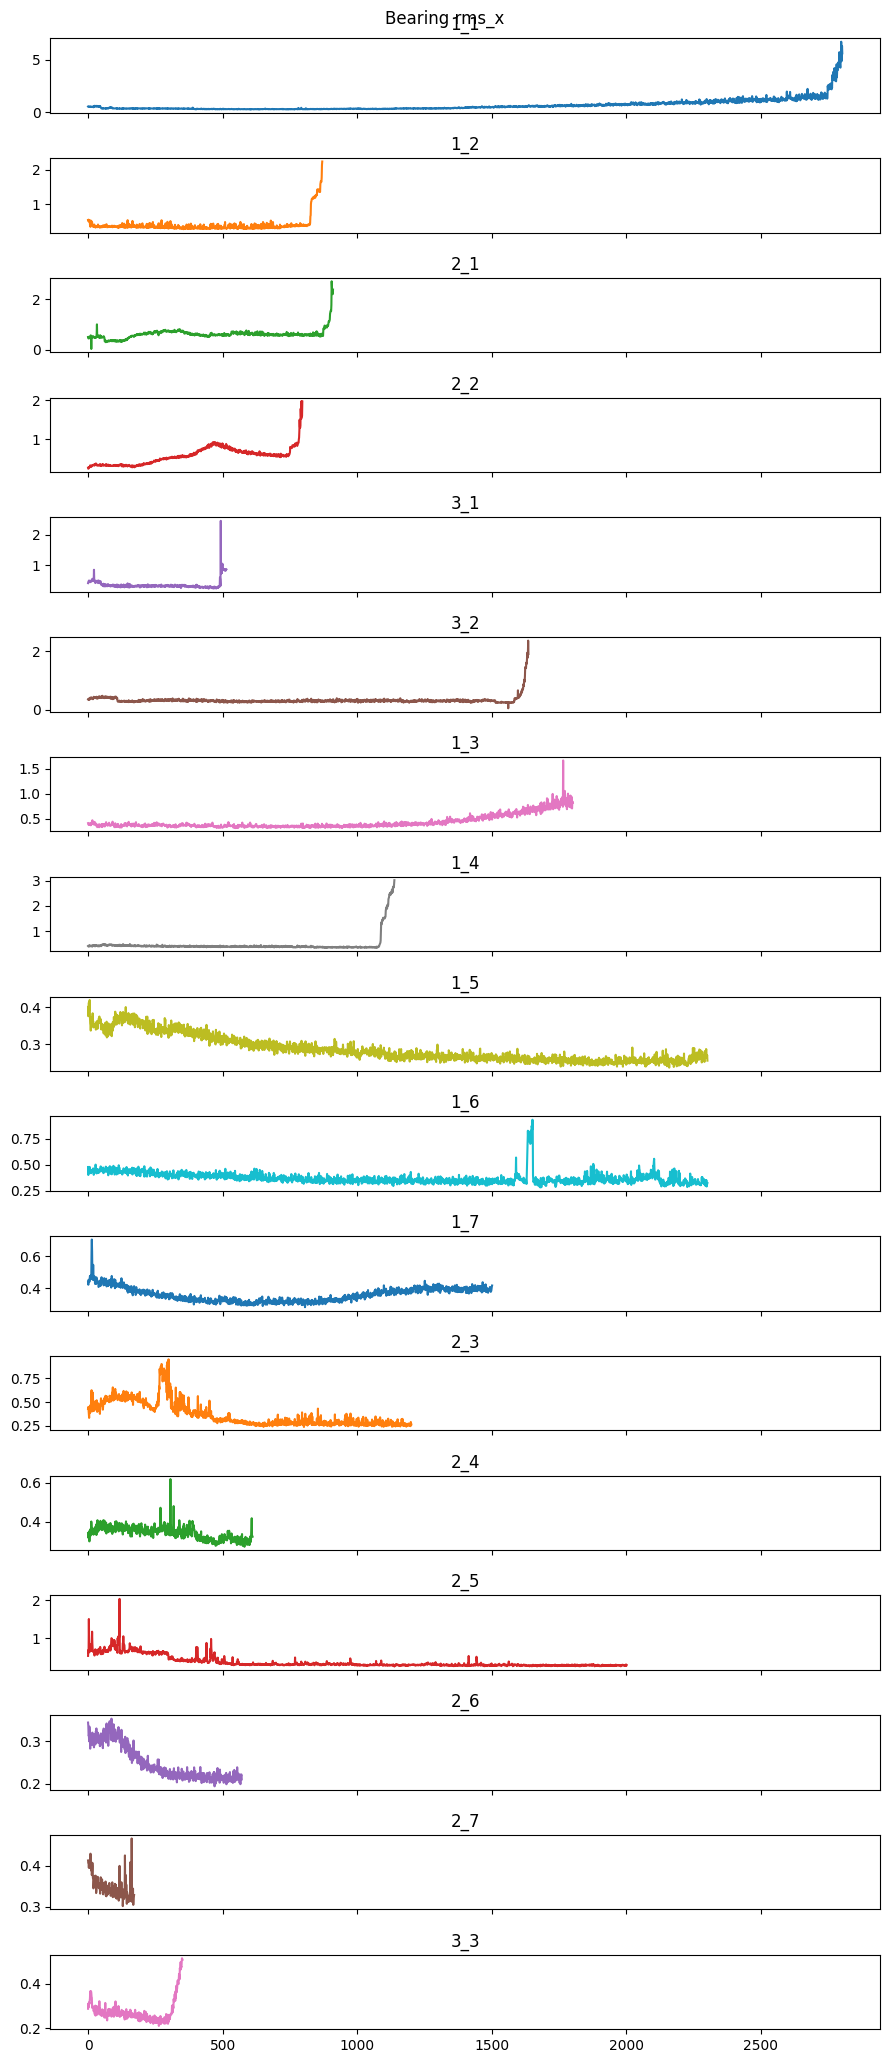

In [20]:
feature_name = 'rms_x'

# fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(21, 36), sharex=True)
fig, axes = plt.subplots(nrows=17, ncols=1, figsize=(9, 21), sharex=True)

# df = (feature_grouped_df["rms_x"] + 0.00*feature_grouped_df["impulse_factor_x"])
df = feature_grouped_df["rms_x"]
df.plot(subplots=True, legend=False, ax=axes, sharex=True)
fig.suptitle(f"Bearing {feature_name}")
# Set titles for each subplot
for i, ax in enumerate(axes.flatten()):
    ax.set_title(df.columns[i])

plt.tight_layout()

In [3]:
rms_x_cpy = feature_grouped_df["rms_x"]
rms_x_cpy.head()

,1_1,1_2,2_1,2_2,3_1,3_2,1_3,1_4,1_5,1_6,1_7,2_3,2_4,2_5,2_6,2_7,3_3
0,0.561749,0.538814,0.509476,0.280230,0.402525,0.354490,0.415694,0.403344,0.400705,0.477477,0.438083,0.430642,0.341327,0.528637,0.344303,0.412892,0.288002
1,0.535210,0.505539,0.460365,0.253066,0.444603,0.349603,0.391157,0.390704,0.375663,0.400512,0.421667,0.448485,0.318182,0.682910,0.336294,0.407494,0.311528
2,0.531246,0.542418,0.453574,0.261418,0.451771,0.362365,0.389000,0.391872,0.401851,0.465260,0.452264,0.414155,0.326811,0.611942,0.313496,0.407721,0.294379
3,0.554940,0.515024,0.503573,0.286929,0.485557,0.353989,0.380441,0.415819,0.412300,0.431622,0.440243,0.390177,0.347249,1.505846,0.314480,0.394940,0.304007
4,0.566667,0.485328,0.463961,0.294282,0.487928,0.392767,0.400797,0.386701,0.402854,0.423056,0.451299,0.333541,0.351314,0.871907,0.300203,0.411485,0.317049


In [16]:
from sklearn.linear_model import LinearRegression
from scipy import signal as sg

def reconstructSignal(data: pd.DataFrame, windowFactor: float, preSmoothingFactor: float, elevationFactor: float, postSmoothingFactor: float):
    dat = pd.DataFrame()
    plt.figure(figsize=(15, 18))
    index = 1
    for columnName in data.columns:

        # load signal and remove all nan values
        signal = data[columnName]
        signal = signal[~np.isnan(signal)]

        for i in range(5):
            signal = sg.savgol_filter(signal, len(signal)//preSmoothingFactor, 2, mode="nearest")

        # processing code ------------------------------

        # compute sliding window
        def SlidingWindow(data, window_length, window_shift):
            mov = np.lib.stride_tricks.sliding_window_view(data, window_length)[::window_shift]
            return np.array(mov)
        
        # compute non - overlapping sliding window
        print(len(signal), windowFactor, len(signal)//windowFactor)
        size_shift = max(10, len(signal)//windowFactor)
        signal_windows = SlidingWindow(signal, size_shift, size_shift)

        prev_chunk_end = None

        processed_signal = np.array([])

        # plot signal chunks
        plt.subplot(9,2,index), plt.title(columnName), plt.tight_layout()
        for i in range(len(signal_windows)):
            # store original signal chunk
            signal_chunk = signal_windows[i]
            time_chunk = np.array(range(size_shift * i, (size_shift * i) + size_shift, 1))

            # compute regression line
            model = LinearRegression()
            model.fit(time_chunk.reshape(-1, 1), signal_chunk.reshape(-1, 1))
            regression_line = model.predict(time_chunk.reshape(-1, 1))

            # compute new signal chunk
            signal_chunk_new = signal_chunk
            if(model.coef_[0][0] < 0 and i > 0):
                signal_chunk_new = signal_chunk_new / (regression_line.flatten() / elevationFactor)
            
            # smoothem the newSignal
            # if(postSmoothingFactor > 0 and model.coef_[0][0] < 0.4):
            #     for i in range(5):
            #         signal_chunk_new = sg.savgol_filter(signal_chunk_new, len(signal_chunk_new)//postSmoothingFactor, 2, mode="nearest")
            
            if(prev_chunk_end != None):
                signal_chunk_new = signal_chunk_new + (prev_chunk_end - signal_chunk_new[0])
            prev_chunk_end = signal_chunk_new[-1]
            
            # for i in range(5):
            #     signal_chunk_new = sg.savgol_filter(signal_chunk_new, len(signal_chunk_new)//postSmoothingFactor, 2, mode="nearest")
            # processed_signal = np.append(processed_signal, signal_chunk_new)

            # plot signal chunk
            plt.plot(time_chunk, signal_chunk)
            
            # plot regression line with corner markers
            plt.plot(time_chunk, regression_line, color="black", zorder=5, lw=0.75)
            # plt.scatter(time_chunk[0], regression_line[0], marker='o', color='black', zorder=5, s=21)
            # plt.scatter(time_chunk[-1], regression_line[-1], marker='o', color='black', zorder=5, s=21)

            # plot newly computed signal
            plt.plot(time_chunk, signal_chunk_new, color="red", lw=1)
            # return

        # ----------------------------------------------

        # add additional zeros
        processed_signal = np.append(processed_signal, np.array([0] * (3000 - len(processed_signal))), axis=0)

        # store data
        dat[columnName] = processed_signal
        index += 1

        # reset signal
        processed_signal = np.array([])

    return dat

2803 100 28
871 100 8
911 100 9
797 100 7
515 100 5
1637 100 16
1802 100 18
1139 100 11
2302 100 23
2302 100 23
1502 100 15
1202 100 12
612 100 6
2002 100 20
572 100 5
172 100 1
352 100 3


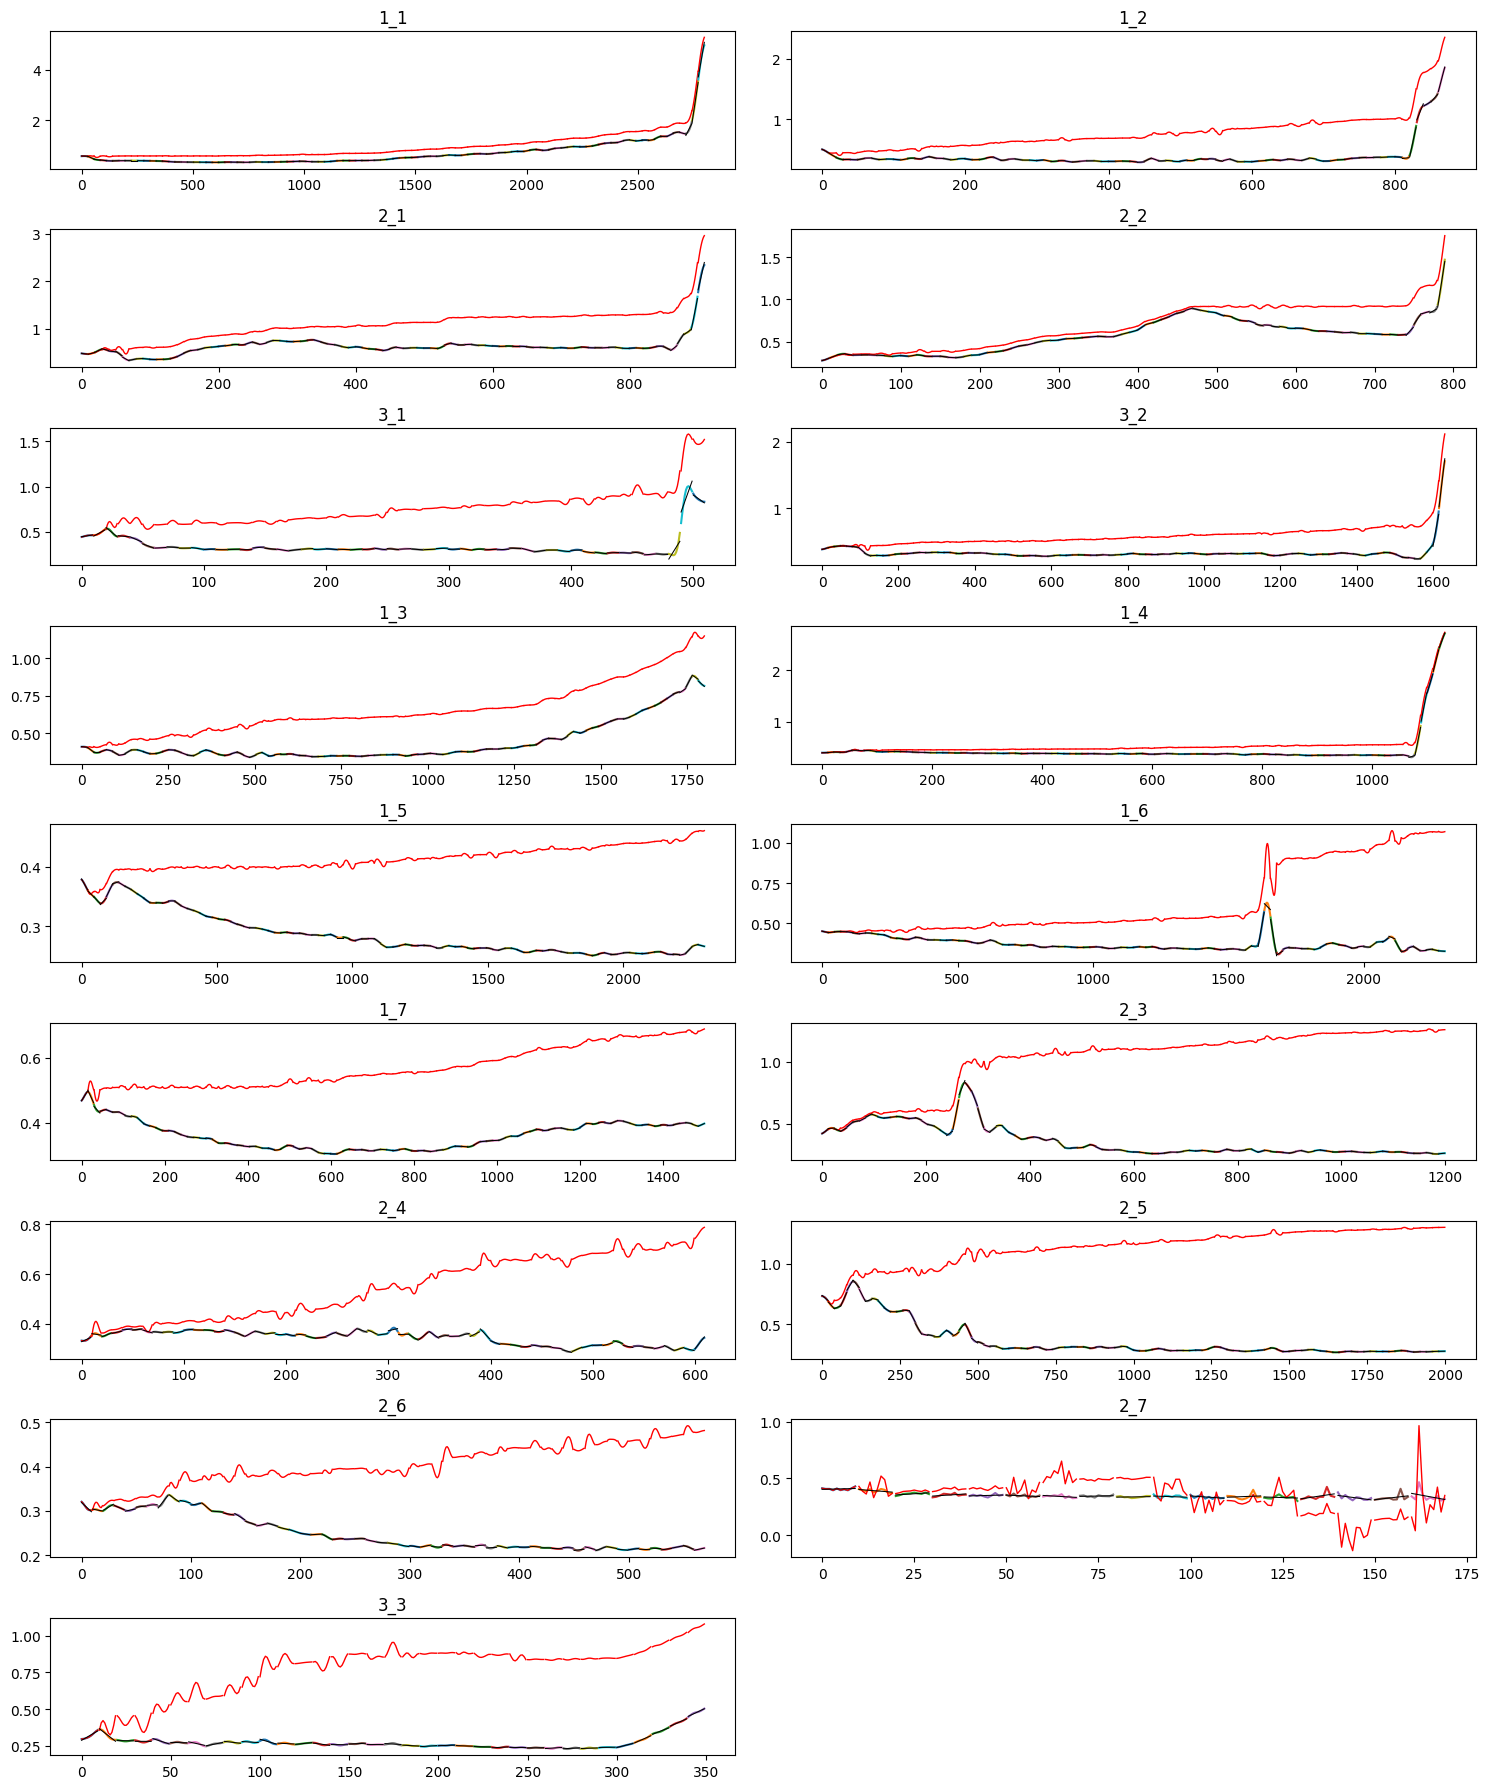

In [22]:
processed_rms = reconstructSignal(rms_x_cpy, preSmoothingFactor=45, windowFactor=100, elevationFactor=2.1, postSmoothingFactor=3)

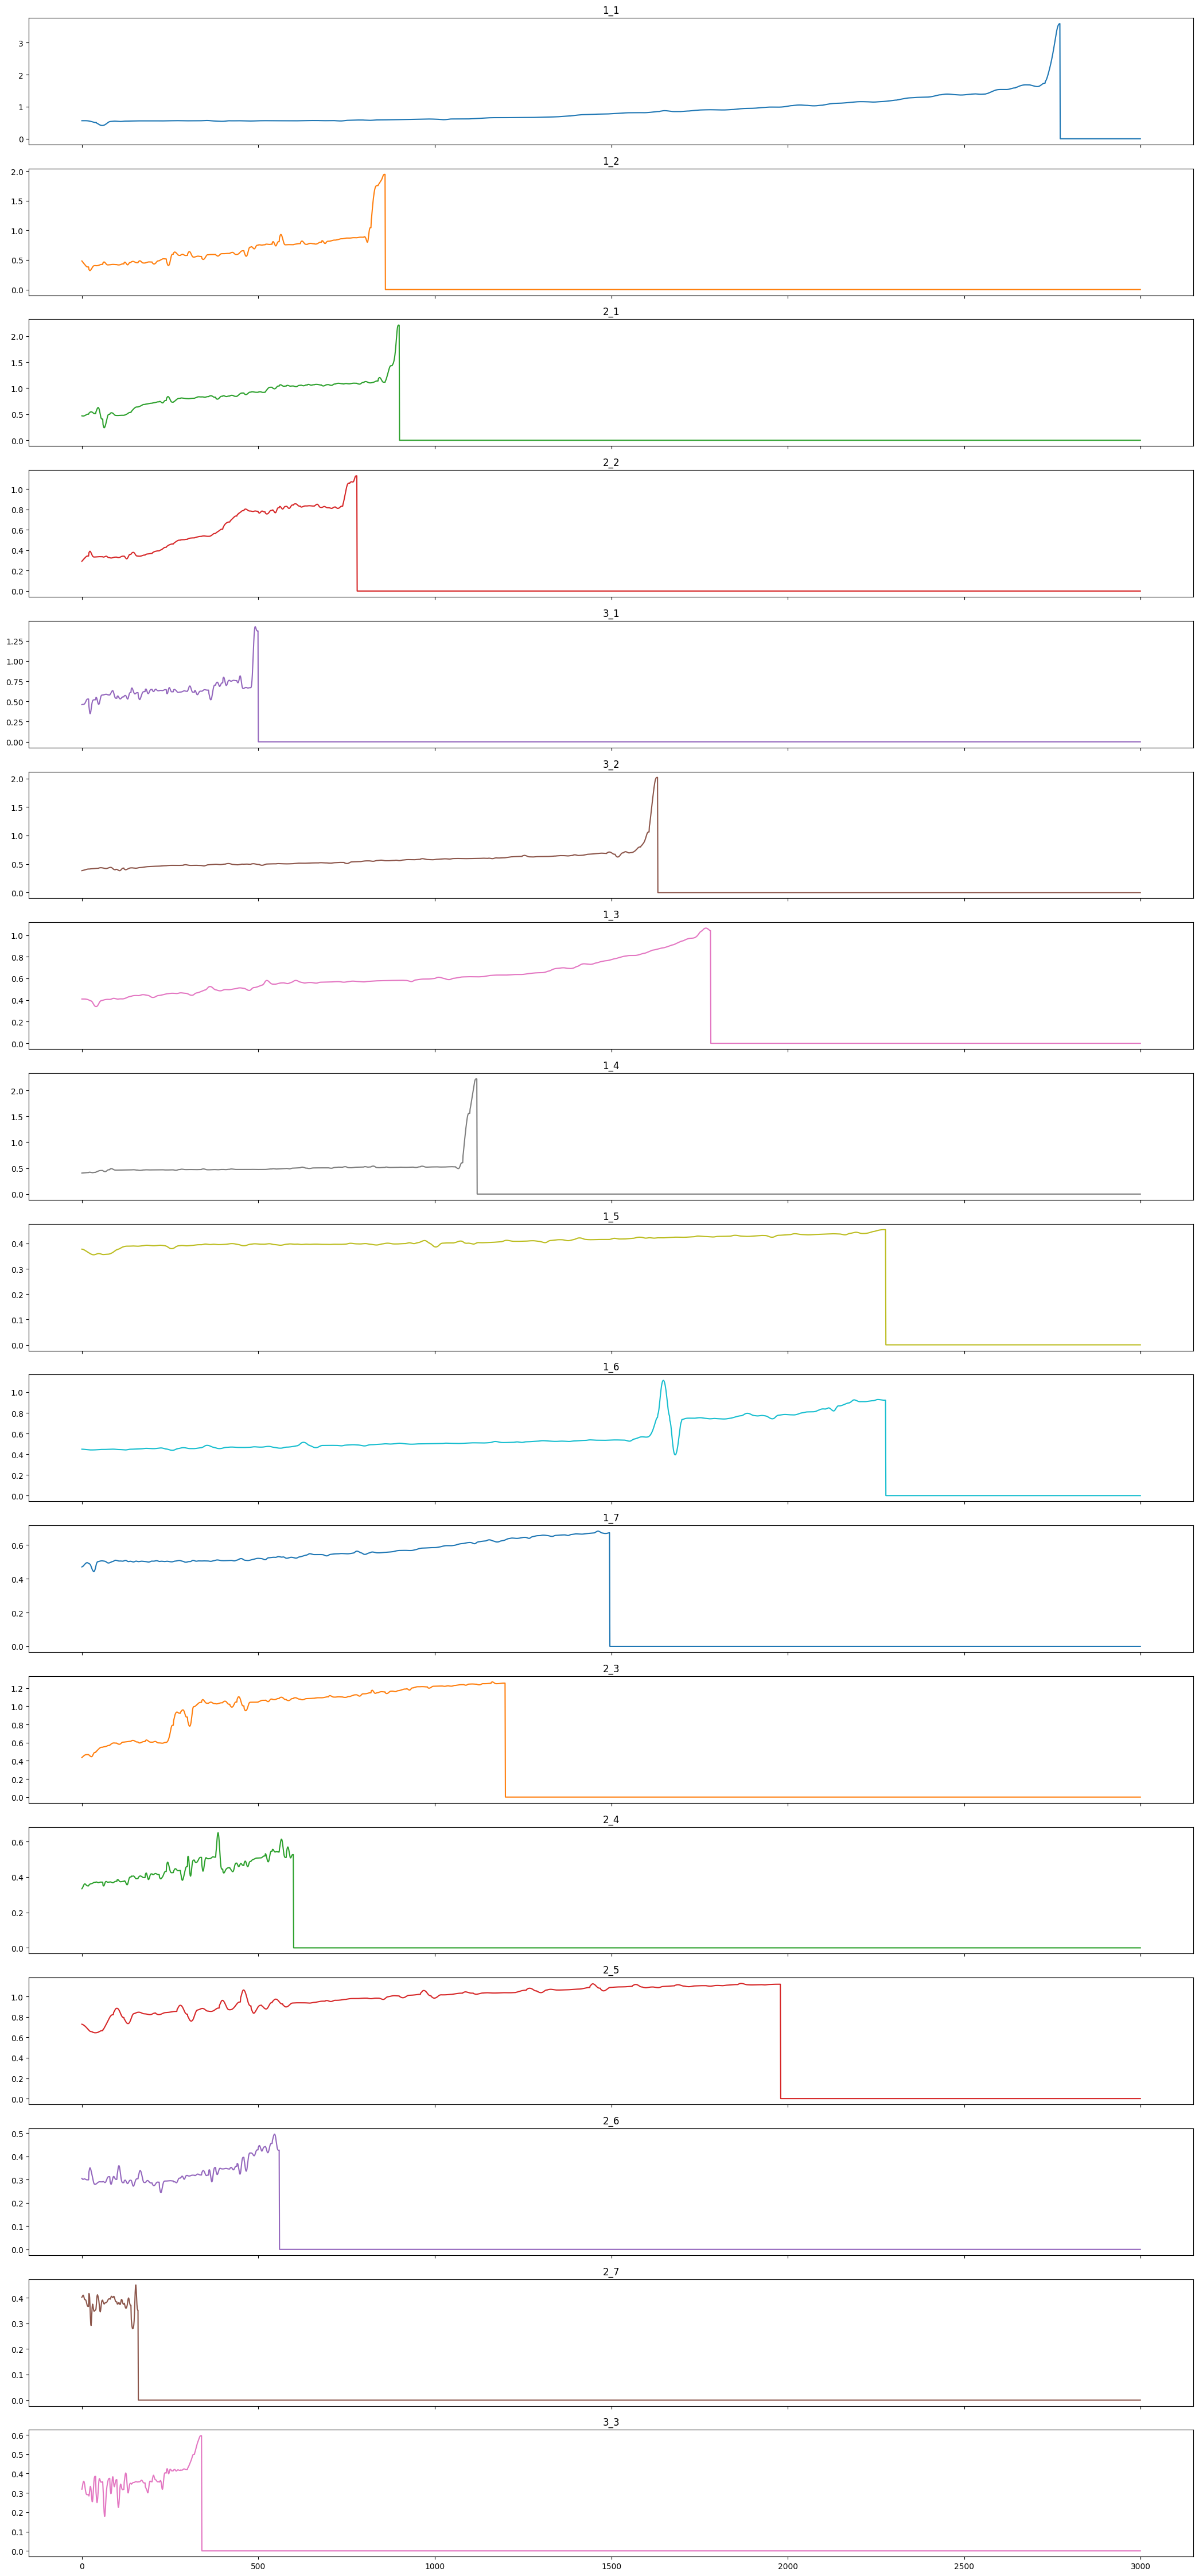

In [8]:
fig, axes = plt.subplots(nrows=17, ncols=1, figsize=(21, 45), sharex=True)

processed_rms.plot(subplots=True, legend=False, ax=axes)
# fig.suptitle(f"Bearing {feature_name}")

for i, ax in enumerate(axes.flatten()):
    ax.set_title(processed_rms.columns[i])

plt.tight_layout()

## Model Training

In [9]:
processed_rms

,1_1,1_2,2_1,2_2,3_1,3_2,1_3,1_4,1_5,1_6,1_7,2_3,2_4,2_5,2_6,2_7,3_3
0,0.546502,0.540697,0.488541,0.273367,0.422875,0.365824,0.404914,0.403710,0.391466,0.460168,0.435236,0.408524,0.337579,0.680152,0.331761,0.412892,0.294111
1,0.546673,0.531152,0.487703,0.276964,0.440415,0.367550,0.405021,0.403215,0.389707,0.457867,0.444221,0.412622,0.335283,0.695487,0.328737,0.407494,0.297186
2,0.545533,0.511009,0.514109,0.280624,0.456993,0.370041,0.405865,0.404192,0.388081,0.456132,0.452796,0.415257,0.330547,0.711134,0.325543,0.407721,0.303509
3,0.546254,0.492569,0.497684,0.283241,0.466701,0.370608,0.405150,0.404060,0.386342,0.452598,0.457083,0.420466,0.330735,0.722817,0.318422,0.394940,0.306853
4,0.546560,0.480328,0.485629,0.287945,0.468309,0.373532,0.404234,0.405804,0.384790,0.450720,0.464993,0.420916,0.328154,0.731083,0.312979,0.411485,0.307277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# bearing_ids = ["1_1", "1_2", "2_1", "2_2", "3_1", "3_2", "1_3", "1_4", "1_5", "1_6", "1_7", "2_3", "2_4", "2_5", "2_6", "2_7", "3_3"]
train_ids = ["1_1", "1_2", "2_1", "2_2", "3_1", "3_2"]
test_ids = ["1_3", "1_4", "1_5", "1_6", "1_7", "2_3", "2_4", "2_5", "2_6", "2_7", "3_3"]

train_x = 